# Different types of Outliers
One must distinguish between univariate and multivariate outliers. Univariate outliers are extreme values in the distribution of a specific variable, whereas multivariate outliers are a combination of values in an observation that is unlikely. For example, a univariate outlier could be a human age measurement of 120 years or a temperature measurement in Antarctica of 50 degrees Celsius.

A multivariate outlier could be an observation of a human with a height measurement of 2 meters (in the 95th percentile) and a weight measurement of 50kg (in the 5th percentile). Both types of outliers can affect the outcome of an analysis but are detected and treated differently.

# Univariate Outliers

- Outliers can be discovered in various ways, including statistical methods, proximity-based methods, or supervised outlier detection. 
- We will use the Boston housing data set which is part of the sklearn library.

In [1]:
#Load libraries

from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
import copy
from scipy import stats
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Load data
X, y = load_boston(return_X_y=True)

#Create data frame
boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Visualizing Outliers

A first and useful step in detecting univariate outliers is the visualization of a variables’ distribution. Typically, when conducting an EDA, this needs to be done for all interesting variables of a data set individually. An easy way to visually summarize the distribution of a variable is the box plot.

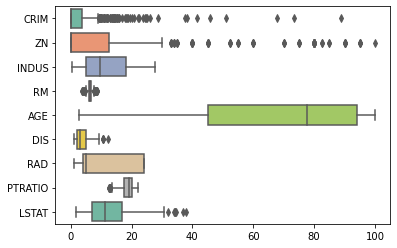

In [2]:
#df.describe()

# created three group plots for three different variable groups

df_1 = df[['TAX', 'B']]
df_2 = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO','LSTAT']]
df_3 = df[['CHAS', 'NOX']]

ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

Let’s look closer into the variable ‘CRIM’, which encodes the crime rate per capita by town. The individual box plot below shows that the crime rate in most towns is below 5%.

Text(0.5, 0, 'Crime rate per capita')

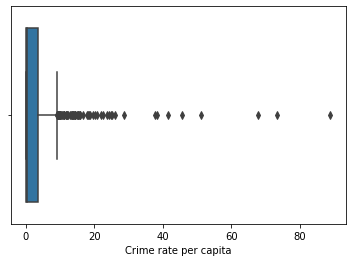

In [3]:
ax = sns.boxplot(x=df["CRIM"])
ax.set_xlabel('Crime rate per capita')

Here we will discuss three quantitative methods commonly used in statistics for the detection of univariate outliers:
- Tukey’s box plot method
- Internally studentized residuals (AKA z-score method)
- Median Absolute Deviation method

### Tukey’s Box Plot method

Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.

<img src="https://miro.medium.com/max/671/1*vQyvZ7yZpLcFk7eDdoc5lg.png" width="700" height="300">

Inner and outer fence are usually calculated using the interquartile range (IQR) like this:

IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile

Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]

Outer fence = [Q1–3*IQR, Q3+3*IQR]

The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3. Following Tukey, only the probable outliers are treated, which lie outside the outer fence. For the underlying example, this means:

In [4]:
#Tukey's method

def tukeys_method(df, variable):  # Creating a User defined function
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        

probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "CRIM")

print("Number of Probable Outliers:", len(probable_outliers_tm))
print("Number of Possible Outliers:", len(possible_outliers_tm))

print("\nProbable Outliers Index:", probable_outliers_tm)
print("\nPossible Outliers Index:", possible_outliers_tm)


Number of Probable Outliers: 30
Number of Possible Outliers: 66

Probable Outliers Index: [374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]

Possible Outliers Index: [367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]


30 observations of the variable ‘crime rate per capita by town’ can be seen as probable and 66 as possible outliers and need further attention. You can easily find the outliers of all other variables in the data set by calling the function <b>tukeys_method</b> for each variable

The great advantage of Tukey’s box plot method is that the statistics (e.g. IQR, inner and outer fence) are robust to outliers, meaning to find one outlier is independent of all other outliers. Also, the statistics are easy to calculate. Furthermore, this method does not require a normal distribution of the data, which is often not guaranteed in real-life settings. If a distribution is highly skewed (usually found in real-life data), the Tukey method can be extended to the <b>log-IQ method</b>. Here, each value is transformed to its logarithm before calculating the inner and outer fences.

Number of Probable Log Outliers: 0
Number of Possible Log Outliers: 6

Probable Log Outliers Index: []

Possible Log Outliers Index: [380, 404, 405, 410, 414, 418]


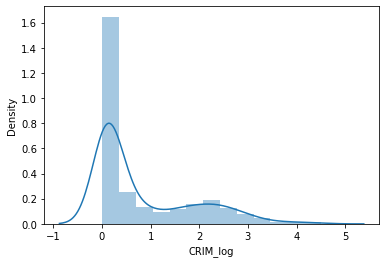

In [5]:
#Transform 'CRIM' to log 
df_log = df.copy()
log_CRIM = np.log(df_log['CRIM'])
df_log['CRIM_man'] = df_log['CRIM']+1
log_CRIM = np.log(df_log['CRIM_man'])
df_log['CRIM_log'] = log_CRIM

#Plot
sns.distplot(df_log['CRIM_log'])

#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = tukeys_method(df_log, 'CRIM_log')

print("Number of Probable Log Outliers:", len(probable_outliers_logiq))
print("Number of Possible Log Outliers:", len(possible_outliers_logiq))

print("\nProbable Log Outliers Index:", probable_outliers_logiq)
print("\nPossible Log Outliers Index:", possible_outliers_logiq)

## Internally studentized residuals AKA z-score method

Another commonly used method to detect univariate outliers is the <b>internally standardized residuals</b>, aka the <b>z-score method</b>. For each observation (Xn), it is measured how many standard deviations the data point is away from its mean (X̄).

<img src="https://miro.medium.com/max/362/1*2nsMcdyUFXe44SXKiqgHOA.png" width="400" height="400">

Following a common rule of thumb, if z > C, where C is usually set to 3, the observation is marked as an outlier. This rule stems from the fact that if a variable is normally distributed, 99.7% of all data points are located 3 standard deviations around the mean. 

Let’s see on our example, which observations of ‘CRIM’ are detected to be outliers using the z-score:


In [6]:
#Internally studentized method (z-score)

def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_z = z_score_method(df, 'CRIM')

print("Number of Z Value Outliers:", len(outlier_z))
print("\nZ Value Outliers Index:", outlier_z)

Number of Z Value Outliers: 8

Z Value Outliers Index: [380, 398, 404, 405, 410, 414, 418, 427]


When using the z-score method, 8 observations are marked as outliers. However, this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is dependent on other outliers as every observation directly affects the mean.

Moreover, the z-score method assumes the variable of interest to be normally distributed. A more robust method that can be used instead is the externally studentized residuals. Here, the influence of the examined data point is removed from the calculation of the mean and standard deviation, like so:

<img src="https://miro.medium.com/max/700/1*nPcDCx1YsRwprn65lxE3Hg.png" width="400" height="400">

Nevertheless, the externally studentized residuals have limitations as the mean and standard deviations are still sensitive to other outliers and still expect the variable of interest X to be normally distributed.

## Median Absolute Deviation method

The <b>median absolute deviation method</b> (MAD) replaces the mean and standard deviation with more robust statistics, like the median and median absolute deviation. The median absolute deviation is defined as:

<img src="https://miro.medium.com/max/700/1*u16eJX1px133bsMJa6fMbg.png" width="400" height="400">

The test statistic is calculated like the z-score using robust statistics. Also, to identify outlying observations, the same cut-off point of 3 is used. If the test statistic lies above 3, it is marked as an outlier. Compared to the internally (z-score) and externally studentized residuals, this method is more robust to outliers and does assume X to be parametrically distributed (Examples of [discrete](https://wiki.analytica.com/index.php?title=Parametric_discrete_distributions) and [continuous](https://wiki.analytica.com/index.php?title=Parametric_continuous_distributions) parametric distributions).

Let’s see how many outliers are detected for variable ‘CRIM’ using the MAD method.

In [7]:
#MAD method

def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

outlier_mad = mad_method(df, 'CRIM')

print("Number of MAD Outliers:", len(outlier_mad))
print("\nZ MAD Outliers Index:", outlier_mad)

Number of MAD Outliers: 165

Z MAD Outliers Index: [20, 31, 32, 34, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 310, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487]


We can see that the MAD method detects 165 outliers for the crime rate per capita by town and with that the most outliers of all methods.

There are different ways to detect univariate outliers, each one coming with advantages and disadvantages. The z-score needs to be applied critically due to its sensitivity to mean and standard deviation and its assumption of a normally distributed variable. The MAD method is often used instead and serves as a more robust alternative. Tukey’s box plot method offers robust results and can be easily extended when the data is highly skewed.

#### To decide on the right approach for your own data set, closely examine your variables’ distribution, and use your domain knowledge.

# Multivariate Outliers

A multivariate outlier is an unusual combination of values in an observation across several variables. For example, it could be a human with a height measurement of 2 meters (in the 95th percentile) and weight measurement of 50kg (in the 5th percentile).

### Visualization

A common way to plot multivariate outliers is the scatter plot. Keep in mind that visualizing multivariate outliers across more than two variables is not feasible in a 2D space. Therefore, we will stick to outliers found across two variables for visualization — so-called bi-variate outliers.

Let’s create a scatterplot between two variables from the Boston housing data set. I choose the variables ‘CRIM’ and ‘LSTAT’ to understand the relationship between the crime rate per capita by town and the percentage of lower status in the population. You can play around and choose any set of numerical variables from the data set and see what changes. Other meaningful combinations worth looking at are, for example, ‘DIS’ & ‘INDUS’, ‘LSTAT’ & ‘PTRATIO’ or ‘INDUS’ & ‘ZN’.

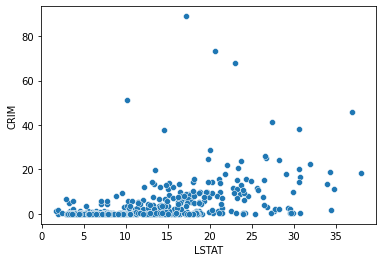

In [8]:
#Scatterpblot
ax = sns.scatterplot(x="LSTAT", y="CRIM", data=df)

Like box plots, scatter plots visualize outlying observations very well but do not identify or mark them for easy treatment. When dealing with multivariate outliers, distance metrics can be helpful for detection. With distance metrics, the distance between two vectors is determined. These two vectors can be two different observations (rows) or an observation (row) compared to the mean vector (row of means of all columns). Distance metrics can be calculated independent of the number of variables in the dataset (columns).

### Mahalanobis Distance

A widely used distance metric for the detection of multivariate outliers is the <b>Mahalanobis Distance</b> (MD). The MD is a measure that determines the distance between a data point x and a distribution D. It is a <b>multivariate generalization</b> of the internally studentized residuals (z-score) introduced in my last article. This means the MD defines how many standard deviations x is away from the mean of D.

It is defined as:

<img src="https://miro.medium.com/max/700/1*O51giyF0VmVXHKmprf0bGg.png" width="400" height="400">

Here, x represents an observation vector and µ the arithmetic mean vector of independent variables (columns) in the sample. C(-1) is the <b>inverse covariance matrix</b> of the independent variables in the sample. To better understand the mathematical intuition behind the MD, I recommend reading under point four in this [blog post](https://www.machinelearningplus.com/statistics/mahalanobis-distance/).

Like the z-score, the MD of each observation is compared to a cut-off point. Assuming a multivariate normal distribution of the data with K variables, the Mahalanobis distance follows a chi-squared distribution with K degrees of freedom. Using a reasonable significance level (e.g., 2.5%, 1%, 0.01%), the cut-off point is defined as:

<img src="https://miro.medium.com/max/368/1*JsMhL1DHVS5cJ7jU8c3KJg.png" width="400" height="200">

Let’s see an example using a 0.01% significance level and searching for bi-variate outliers in the subset used before.

In [9]:
#Mahalonibis Distance

def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_bi, md_bi = mahalanobis_method(df=df[['LSTAT', 'CRIM']])

print("Number of Outliers for Bi-Variate Data:", len(outliers_mahal_bi))
print("Outliers Index:", outliers_mahal_bi)

outliers_mahal, md = mahalanobis_method(df=df)

print("\nNumber of Outliers for entire Data:", len(outliers_mahal))
print("Outliers Index:", outliers_mahal)

Number of Outliers for Bi-Variate Data: 8
Outliers Index: [380, 398, 404, 405, 410, 414, 418, 427]

Number of Outliers for entire Data: 17
Outliers Index: [152, 155, 214, 353, 364, 365, 367, 380, 405, 410, 414, 418, 488, 489, 490, 491, 492]


Using the Mahalanobis distance, we can see that 8 observations are marked as bi-variate outliers. When including all variables of the Boston dataset (df=13), we detect 17 multivariate outliers.

Look closer at observation 398. It seems like when looking at the subset of two variables, it is an outlier. However, when considering the whole dataset, it is not. Therefore, when running your own data science project, make sure to only include variables in your detection process that are interesting for your further analysis. Otherwise, some observations may be flagged as outliers because of an irrelevant variable.

A drawback of the MD is that it uses the arithmetic mean and covariance matrix and, with that, is highly sensitive to outliers in the data. Several methods exist that use robust estimates for <b>µ</b> and <b>C</b>. Let's discuss the Minimum Covariance Determinant method, introduced by Rousseeuw, as an example.

### Robust Mahalanobis Distance


The Minimum Covariance Determinant method (MCD) provides robust estimates for <b>µ</b> and <b>C</b> by only using a subset of the sample. It only uses the observations where the determinant of the covariance matrix is as small as possible. It is defined as the classic MD but with robust estimates for mean and covariance:

<img src="https://miro.medium.com/max/700/1*TZwPN7HFBHDNUe86LGArkQ.png" width="400" height="200">

The Python library sklearn includes a function to fit the MCD to any dataset to receive a robust covariance matrix and mean.

Let’s go back to our example and see how the result changes:

In [10]:
#Robust Mahalonibis Distance

def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=df[['LSTAT', 'CRIM']])

print("Number of Outliers for Bi-Variate Data:", len(outliers_mahal_rob_bi))
print("Outliers Index:", outliers_mahal_rob_bi)

outliers_mahal_rob, md_rb = robust_mahalanobis_method(df=df)

print("\nNumber of Outliers for entire Data:", len(outliers_mahal_rob))
print("Outliers Index:", outliers_mahal_rob)

Number of Outliers for Bi-Variate Data: 9
Outliers Index: [141, 380, 398, 404, 405, 410, 414, 418, 427]

Number of Outliers for entire Data: 21
Outliers Index: [123, 126, 142, 152, 155, 163, 214, 283, 353, 364, 365, 367, 380, 405, 410, 418, 488, 489, 490, 491, 492]


We can see that the robust MD finds a few more outliers than the classic MD. 9 bi-variate outliers for the 2D dataset example and 21 multivariate outliers when considering all features of the Boston dataset.

The two plots below (based on the 2D dataset example) help visualizing the difference between the classic (left) and robust (right) distance measurement:

In [11]:
data = copy.deepcopy(df)
data['flag'] = 0
data['flag_rob'] = 0

for i in outliers_mahal_bi:
    data['flag'][i] = 1
    
for i in outliers_mahal_rob_bi:
    data['flag_rob'][i] = 1    

<AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>

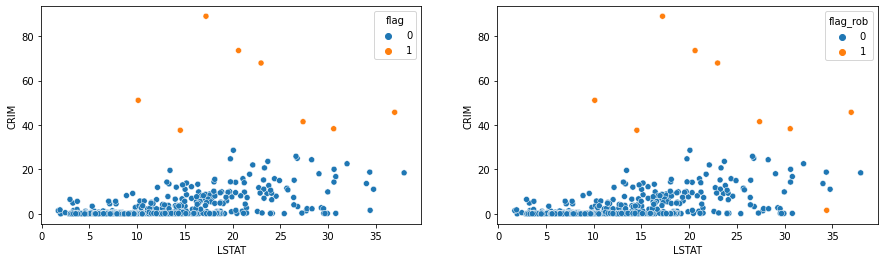

In [12]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(x="LSTAT", y="CRIM", data=data, hue='flag')
plt.subplot(1,2,2)
sns.scatterplot(x="LSTAT", y="CRIM", data=data, hue='flag_rob')

Next to univariate outliers, it is also important to examine an underlying data set for multivariate outliers. Both types of outliers can significantly impact the outcomes of a data analysis or machine learning projects. In this post, we learned that multivariate outliers are a unique combination of values in an observation and can be detected through distance metrics.

A commonly used distance metric is the Mahalanobis distance. Its classic definition relies on the mean and covariance between all variables of a dataset. It is, therefore, sensitive to outliers. One way to receive more robust estimates for the mean and covariance is the Minimum Covariance Determinants method (MCD).

Finally, it is important to note that there are several other ways of detecting univariate and multivariate outliers. Other popular methods are k-nearest neighbours, DBSCAN, or isolation forests, just to name a few. There is no right or wrong method, but one might be more appropriate than another for your data set. When deciding on the outlier detection method you would like to use, I recommend basing your decision on the data’s distribution, sample size, and the number of dimensions.